In [1]:
import pickle
import os
from matplotlib import pyplot as plt
import numpy as np
import glob
os.chdir('/root/evaluate-saliency-4/jigsaw')
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

plotting a single image's mrf,lrf trend
dict_keys(['mrf_scores', 'lrf_scores', 'metricname', 'mrf_per_threshold', 'lrf_per_threshold', 'modelname', 'methodname', 'classname'])


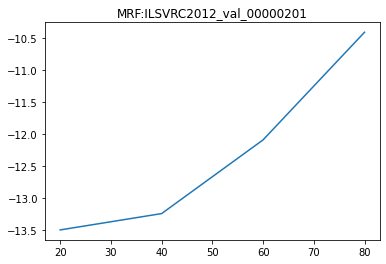

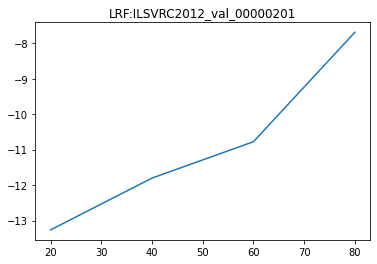

plotting a single image's mrf,lrf trend
dict_keys(['mrf_scores', 'lrf_scores', 'metricname', 'mrf_per_threshold', 'lrf_per_threshold', 'modelname', 'methodname', 'classname'])


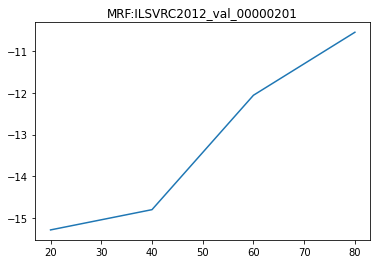

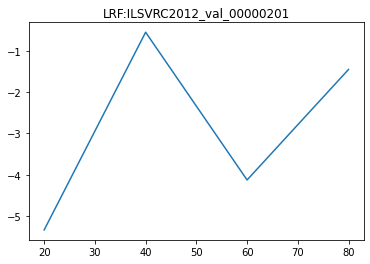

In [8]:
import settings
metricname = 'perturbation'
# methodname = 'inputXgradients'
# methodname = 'jigsaw-saliency'
methodname = 'gradcam'
modelname = 'vgg16'
imagenet_root = '/root/evaluate-saliency-4/jigsaw/imagenet'
#TODO: this should be from the saved metrics?
# image_paths = sorted(glob.glob(os.path.join(imagenet_root,'images','val','*.JPEG')))
# image_paths = sorted(glob.glob(os.path.join(settings.RESULTS_DIR,f'{methodname}-{modelname}','*/')))
# image_paths = sorted(glob.glob(os.path.join(settings.RESULTS_DIR,f'{methodname}-{modelname}','*/')))
# methoddir =  os.path.join(settings.RESULTS_DIR,f'{methodname}-{modelname}')
image_paths =  sorted(
    glob.glob(
        os.path.join(
            settings.RESULTS_DIR,
            os.path.join('metrics',f'{metricname}-{methodname}-{modelname}','*/')
        )
        )
)

for image_path in image_paths:
    print('plotting a single image\'s mrf,lrf trend')
    if '.JPEG' in image_path:
        imroot = image_path[:-len('.JPEG')]
        print(imroot)
    else:
        imroot = image_path
    imroot = os.path.basename(imroot.rstrip(os.path.sep))
    load_dir = os.path.join(settings.RESULTS_DIR,'metrics',f'{metricname}-{methodname}-{modelname}',imroot)
#     print(load_dir)
    pkls = glob.glob(os.path.join(load_dir,'*.pkl'))
#     print(pkls,len(pkls))
    assert len(pkls) > 0
    assert len(pkls) == 1
    pkl = pkls[0]
    with open(pkl,'rb') as f:
        loaded = pickle.load(f)
    print(loaded.keys())
    mrf_per_threshold = loaded['mrf_per_threshold'].values()
    mrf_thresholds = loaded['mrf_per_threshold'].keys()
    #---------------------------------------------
    plt.figure()
    plt.plot(mrf_thresholds,mrf_per_threshold)
    plt.title(f'MRF:{imroot}')
    plt.show()
    #---------------------------------------------
    lrf_per_threshold = loaded['lrf_per_threshold'].values()
    lrf_thresholds = loaded['lrf_per_threshold'].keys()
    plt.figure()
    plt.plot(lrf_thresholds,lrf_per_threshold)
    plt.title(f'LRF:{imroot}')
    plt.show()
    break

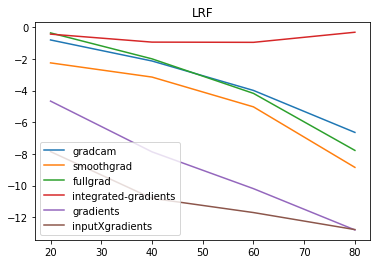

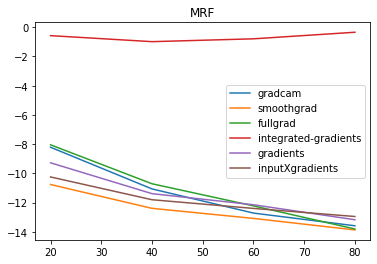

In [42]:
fig_mrf = plt.figure()
fig_lrf = plt.figure()
methodnames = [  
                'gradcam',
                'smoothgrad',
                'fullgrad',
                'integrated-gradients',
                'gradients',
                'inputXgradients'
#                 'jigsaw-saliency'
                ]
for methodname in methodnames:
    consolidated_pkl =os.path.join(
                settings.RESULTS_DIR,
                os.path.join('metrics',f'{metricname}-{methodname}-{modelname}'),
                'consolidated.pkl'
            )
    with open(consolidated_pkl,'rb') as f:
        loaded_consolidated = pickle.load(f)
    mrf_per_threshold = loaded_consolidated['mrf_per_threshold'].values()
    mrf_thresholds = loaded_consolidated['mrf_per_threshold'].keys()
    mrf_thresholds = 100. - np.array(list(mrf_thresholds))
    fig_mrf.gca().plot(mrf_thresholds,mrf_per_threshold,label=methodname)
    

    #---------------------------------------------
    lrf_per_threshold = loaded_consolidated['lrf_per_threshold'].values()
    lrf_thresholds = loaded_consolidated['lrf_per_threshold'].keys()
    lrf_thresholds = 100. - np.array(list(lrf_thresholds))
    fig_lrf.gca().plot(lrf_thresholds,lrf_per_threshold,label=methodname)
    
# plt.scf(fig_lrf.number)
plt.figure(fig_lrf)
plt.title(f'LRF')
plt.legend()
fig_lrf.canvas.draw()


plt.figure(fig_mrf)
plt.title(f'MRF')
plt.legend()
fig_mrf.canvas.draw()



In [4]:
import settings
from collections import defaultdict
def consolidate_metrics(
    metricname = 'perturbation',
    methodname = 'jigsaw-saliency',
    modelname = 'vgg16',
    imagenet_root = '/root/evaluate-saliency-4/jigsaw/imagenet',
):

    #TODO: this should be from the saved metrics?
    # image_paths = sorted(glob.glob(os.path.join(imagenet_root,'images','val','*.JPEG')))
    image_paths = sorted(glob.glob(os.path.join(settings.RESULTS_DIR,f'{methodname}-{modelname}','*/')))
    avg_mrf_per_threshold = defaultdict(int)
    avg_lrf_per_threshold = defaultdict(int)
#     print(len(image_paths))
    for i,image_path in enumerate(image_paths):
        if '.JPEG' in image_path:
            imroot = image_path[:-len('.JPEG')]
            print(imroot)
        else:
            imroot = image_path
        imroot = os.path.basename(imroot.rstrip(os.path.sep))
        load_dir = os.path.join(settings.RESULTS_DIR,'metrics',f'{metricname}-{methodname}-{modelname}',imroot)
    #     print(load_dir)
        pkls = glob.glob(os.path.join(load_dir,'*.pkl'))
    #     print(pkls,len(pkls))
        assert len(pkls) > 0
        assert len(pkls) == 1
        pkl = pkls[0]
        with open(pkl,'rb') as f:
            loaded = pickle.load(f)
#         print(loaded.keys())
        if i >0:
            assert set(loaded['mrf_per_threshold'].keys()).difference(avg_mrf_per_threshold.keys()).__len__() == 0
        if i >0:
            assert set(loaded['lrf_per_threshold'].keys()).difference(avg_lrf_per_threshold.keys()).__len__() == 0            
        if False:
            mrf_per_threshold = loaded['mrf_per_threshold'].values()
            mrf_thresholds = loaded['mrf_per_threshold'].keys()
            #---------------------------------------------
            plt.figure()
            plt.plot(mrf_thresholds,mrf_per_threshold)
            plt.title(f'MRF:{imroot}')
            plt.show()
            #---------------------------------------------
            lrf_per_threshold = loaded['lrf_per_threshold'].values()
            lrf_thresholds = loaded['lrf_per_threshold'].keys()
            plt.figure()
            plt.plot(lrf_thresholds,lrf_per_threshold)
            plt.title(f'LRF:{imroot}')
            plt.show()
        
        for k,m in loaded['mrf_per_threshold'].items():
            avg_mrf_per_threshold[k] += m
        for k,m in loaded['lrf_per_threshold'].items():
            avg_lrf_per_threshold[k] += m

    for k,m in avg_mrf_per_threshold.items():
        avg_mrf_per_threshold[k] /= len(image_paths)
    for k,m in avg_lrf_per_threshold.items():
        avg_lrf_per_threshold[k] /= len(image_paths)
            
    return avg_mrf_per_threshold,avg_lrf_per_threshold
avg_mrf_per_threshold,avg_lrf_per_threshold = consolidate_metrics(
    metricname = 'perturbation',
    methodname = 'jigsaw-saliency',
    modelname = 'vgg16',
    imagenet_root = '/root/evaluate-saliency-4/jigsaw/imagenet',
)
if True:
    mrf_per_threshold = avg_mrf_per_threshold.values()
    mrf_thresholds = avg_mrf_per_threshold.keys()
    #---------------------------------------------
    plt.figure()
    plt.plot(mrf_thresholds,mrf_per_threshold)
    plt.title(f'MRF:{imroot}')
    plt.show()
    #---------------------------------------------
    lrf_per_threshold = avg_lrf_per_threshold.values()
    lrf_thresholds = avg_lrf_per_threshold.keys()
    plt.figure()
    plt.plot(lrf_thresholds,lrf_per_threshold)
    plt.title(f'LRF:{imroot}')
    plt.show()


AssertionError: 